<h1>Retail price prediction - www.machinehack.com </h1>
Challenging the MachineHack community to come up with an algorithm to predict the price of retail items belonging to different categories. 

---

<b>* Import Libraries *

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b>* Load dataframe *

In [2]:
#Loading the dataset

df = pd.read_csv('Train.csv') #train data
df_test = pd.read_csv('Test.csv') #test data

<h1>1. Exploratory Data Analysis

In [3]:
#checking 5 sample values from train set

df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
170141,13299,280,2454,12,2011-10-04 11:56:00,1.25,16186.0,35
110668,7558,3201,2861,2,2011-06-05 12:51:00,1.25,16883.0,35
93699,1754,988,2327,6,2011-01-13 09:29:00,2.95,13089.0,35
281385,4376,1392,1974,24,2011-03-24 14:56:00,0.42,16063.0,35
198216,14877,2189,2964,16,2011-10-28 08:34:00,1.25,13632.0,35


In [4]:
#checking 5 sample values from test set

df_test.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
99525,1058,3124,526,2,2010-12-15 11:56:00,15950.0,35
48507,8434,2079,3025,4,2011-06-22 12:09:00,15194.0,35
101390,4646,1611,1857,3,2011-03-30 17:33:00,17400.0,35
53374,2336,1601,2616,12,2011-01-31 09:57:00,12731.0,13
13295,15816,682,1970,1,2011-11-09 14:11:00,17867.0,35


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


---
There is no null value in the dataset, row depth 284780, row width 8

In [6]:
df['InvoiceNo'].nunique() #20971 unique value in InvoiceNo column 

20971

In [7]:
#Finding top 20 most frequent invoice no and their count 

df.groupby('InvoiceNo').agg('StockCode').count().sort_values(ascending=False).head(20)

InvoiceNo
17524    384
16242    383
18165    360
15081    310
17128    305
12326    290
12514    273
15896    267
14160    260
14606    257
12832    245
13764    243
4148     218
13211    202
10172    194
2498     181
13832    178
7007     167
13526    164
10186    160
Name: StockCode, dtype: int64

In [8]:
df['StockCode'].nunique() # there is 3619 no unique StockCode

3619

In [9]:
df['Description'].nunique() # there is 3819 no unique Description

3819

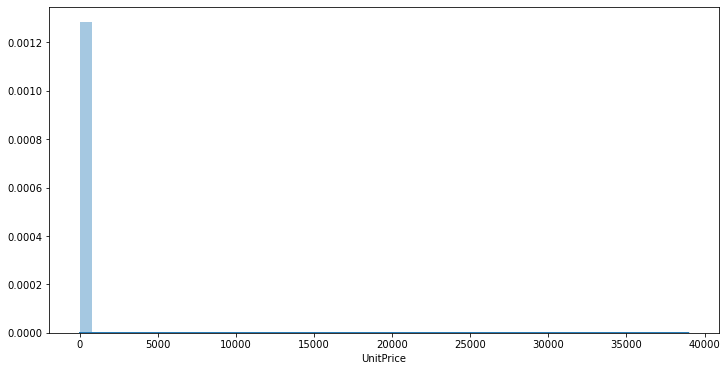

In [10]:
#plot the distribution of UnitPrice

plt.figure(figsize=(12,6))
sns.distplot(df['UnitPrice'])

<b>Observation: unitprice is highly skewed

---

In [11]:
df['UnitPrice'].describe() #Price is positively skewed, so right tail is longer

count    284780.000000
mean          3.451216
std          78.399541
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

<b> May have to take log over price value for the skewness

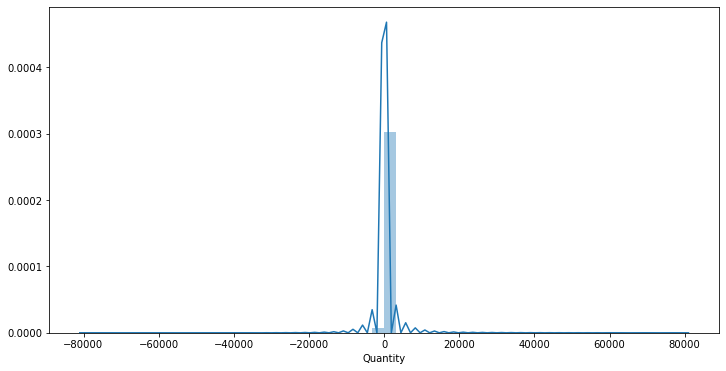

In [12]:
#plot the distribution of Quantity

plt.figure(figsize=(12,6))
sns.distplot(df['Quantity'])

In [13]:
#Checking negative values in quatity 

df[df['Quantity']<0].sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
180978,22185,2403,2329,-80995,2011-12-09 09:27:00,2.08,16446.0,35
271013,18958,2001,2002,-74215,2011-01-18 10:17:00,1.04,12346.0,35
149832,19744,3249,3716,-1930,2011-04-18 13:08:00,2.55,15749.0,35
6362,19934,3681,2140,-1350,2011-05-12 15:19:00,0.16,18133.0,35
25879,19744,2600,3436,-1300,2011-04-18 13:08:00,2.55,15749.0,35
...,...,...,...,...,...,...,...,...
180135,21279,3683,2624,-1,2011-09-30 12:51:00,7.62,13426.0,35
180203,22084,815,1450,-1,2011-12-01 10:56:00,0.79,16376.0,35
180205,20930,3216,871,-1,2011-08-31 12:24:00,12.75,18225.0,35
71188,20423,2802,2776,-1,2011-06-29 15:14:00,3.95,13982.0,35


<b>Observation: The negative values may be treated 

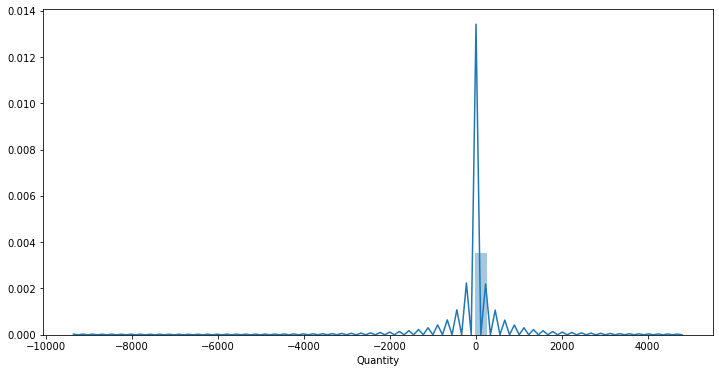

In [14]:
#Distribution of quantity in test set


plt.figure(figsize=(12,6))
sns.distplot(df_test['Quantity'])

In [15]:
#how many unique countries are present in the dataset

df['Country'].nunique() 

37

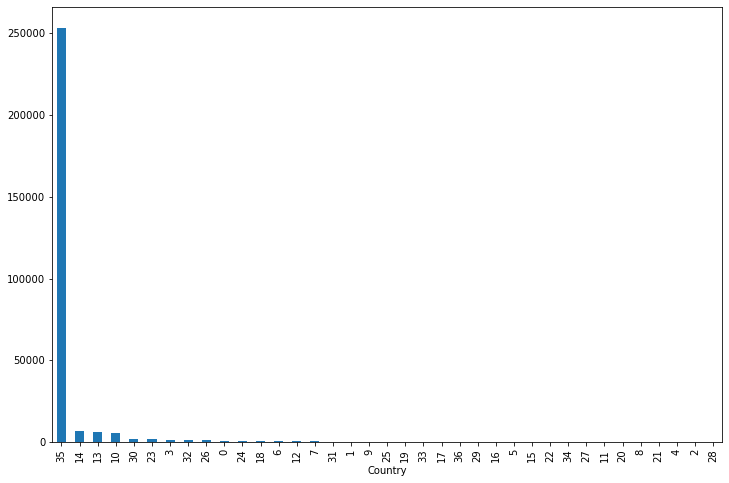

In [16]:
#visualizing count of observations for each country

plt.figure(figsize=(12,8))
df.groupby('Country').agg('Description').count().sort_values(ascending=False).plot(kind='bar')

In [17]:
#see dataframe for prices more than 100

df[df['UnitPrice']>100].sort_values(by='UnitPrice',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
140723,20237,3681,2140,-1,2011-06-10 15:31:00,38970.00,15098.0,35
239556,19848,3683,2624,-1,2011-05-03 12:51:00,8142.75,16029.0,35
51127,14824,3681,2140,1,2011-10-27 14:13:00,4161.06,12536.0,13
113566,21589,3681,2140,-2,2011-10-27 14:15:00,4161.06,12536.0,13
266800,14826,3681,2140,1,2011-10-27 14:20:00,4161.06,12536.0,13
...,...,...,...,...,...,...,...,...
241838,5886,1673,692,2,2011-05-03 10:42:00,110.00,16133.0,35
92453,12073,1673,692,2,2011-09-13 11:47:00,110.00,14646.0,23
128494,2017,1673,692,3,2011-01-21 13:07:00,110.00,14088.0,35
151555,20594,3681,2140,-1,2011-07-19 14:56:00,106.40,14437.0,35


In [18]:
df[df['Description']==2140]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3227,13336,3681,2140,1,2011-10-04 15:21:00,7.95,16374.0,35
3271,14937,3681,2140,8,2011-10-28 16:45:00,0.39,14071.0,35
3318,5469,3681,2140,18,2011-04-18 13:46:00,0.10,16399.0,35
4227,2029,3681,2140,1,2011-01-21 14:51:00,10.00,16210.0,35
6362,19934,3681,2140,-1350,2011-05-12 15:19:00,0.16,18133.0,35
...,...,...,...,...,...,...,...,...
278843,22187,3681,2140,-1,2011-12-09 10:28:00,224.69,15498.0,35
281075,21563,3681,2140,-1,2011-10-25 12:30:00,80.00,14527.0,35
281438,7856,3681,2140,12,2011-06-09 14:23:00,0.38,17522.0,35
283244,14012,3681,2140,1,2011-10-14 10:42:00,40.00,15482.0,35


In [19]:
df.corr()['UnitPrice']['Quantity']

-0.0009240275617004388

<h1>2. Feature Engineering

---
<b> Extract features from invoice date

In [20]:
#Extracting field of month, year, weekday and no of week from invoice date

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['month'] = df['InvoiceDate'].apply(lambda date:date.month)
df['year'] = df['InvoiceDate'].apply(lambda date:date.year)
df['weekday'] = df['InvoiceDate'].apply(lambda date:date.weekday())
df['No_of_Week'] = df['InvoiceDate'].apply(lambda date:date.week)

In [21]:
#Applied same in test set

df_test['InvoiceDate'] = pd.to_datetime(df_test['InvoiceDate'])
df_test['month'] = df_test['InvoiceDate'].apply(lambda date:date.month)
df_test['year'] = df_test['InvoiceDate'].apply(lambda date:date.year)
df_test['weekday'] = df_test['InvoiceDate'].apply(lambda date:date.weekday())
df_test['No_of_Week'] = df_test['InvoiceDate'].apply(lambda date:date.week)

---

<b> Ranking months as per total unitprice </b><p>
(First we'll sort the months based on total sales volume (Price), then we'll assign ranks to the months accordingly)

In [22]:
#sorting months based on total UnitPrice sold for each month

df.groupby('month').agg('UnitPrice').sum().sort_values(ascending=False)

month
11    138946.730
10    132638.550
6     102385.210
12     96546.120
9      83841.202
5      79160.680
3      66292.840
7      64243.631
4      61228.571
8      59668.270
1      51362.970
2      46522.490
Name: UnitPrice, dtype: float64

In [23]:
#Create a dictionary based on months order and map with month filed to create a new field based on total sales 

dic_month = {11:12,10:11,6:10,12:9,9:8,5:7,3:6,7:5,4:4,8:3,1:2,2:1}  

# Train set
df['High_month'] = df['month'].map(dic_month)


# Test set

df_test['High_month'] = df_test['month'].map(dic_month)

In [24]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,weekday,No_of_Week,High_month
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,2011,4,18,7
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,2011,2,19,7


---

<b> Create rank of description based on price</b> <p>
First, we'll generate an Excel File based on average unit price of each description, then we'll assign ranks to them - higher average price will get high values in rank and lower average price will get lower ranks. After that, we'll create a dictionary with indexes are the <b>descriptions,</b> and <b>ranks</b> are the values and map it with our original dataframe

<b><Font color="red">Alert!!!!!!!! Running the below line will remove ranks from excel file! So, run with separate file name

In [25]:
#creating file by sorting description based on mean UnitPrice

# df.groupby(['Description']).agg('UnitPrice').mean().reset_index().sort_values(by='UnitPrice',ascending=False).to_csv('-Price_rank.csv')

In [26]:
#uploading ranking from .CSV file

d_price = pd.read_csv('Price_rank.csv')
d_price.head(5)

,Description,UnitPrice,Rank
0,1043,781.587857,30
1,2405,649.500000,29
2,882,496.340833,28
3,2140,334.676469,27
4,3571,156.111111,26


In [27]:
#change the dataframe to dictionary for mapping 

dic_price=pd.Series(d_price.Rank.values,index=d_price.Description).to_dict()

In [28]:
#map the rank with description and and create new field 

#train set

df['Price_rank']=df['Description'].map(dic_price)

#test set

df_test['Price_rank']=df_test['Description'].map(dic_price)

In [29]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,weekday,No_of_Week,High_month,Price_rank
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,2011,4,18,7,8
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,2011,2,19,7,4


---
<b>Create rank of mean UnitPrice based on per month sales of each description </b><p>

<h5>(The price of the products may vary with each month! Keeping the seasonality of a product in mind, I'll rank each product description for every months average sales)
    
---

<b><Font color="red">Alert!!!!!!!! Running the below line will remove ranks from excel file! So, run with separate file name

In [30]:
#important : creating file by sorting description & month based on mean UnitPrice

# df.groupby(['month','Description']).agg('UnitPrice').mean().reset_index().sort_values(by='UnitPrice', ascending=False).to_excel('-month_description.xls')

In [31]:
#uploading the ranked excel file 

d_price_des = pd.read_excel('month_description.xls')
d_price_des.head(5)

,month,Description,UnitPrice,ID,Rank
0,1,2140,195.9,1-2140,196
1,1,2898,165.0,1-2898,165
2,1,3621,125.0,1-3621,125
3,1,692,110.0,1-692,110
4,1,2933,65.0,1-2933,65


ID - Field manufactured from month and description to create a unique combination<p>
Rank - Average unit price rounded off to make a rank

In [32]:
#creating a unique field by concatinate month and description

df['month_nd_des'] = df[['month', 'Description']].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)


In [33]:
#test set

df_test['month_nd_des'] = df_test[['month', 'Description']].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)

month_nd_des filed in dataframe and ID field in excel has same attributes, so we can map the rankings based on this field

In [34]:
#change the dataframe to dictionary for mapping 

dic_price_des=pd.Series(d_price_des.Rank.values,index=d_price_des.ID).to_dict()

#map the dictionary with unique field

df['Price_rank_des_month']=df['month_nd_des'].map(dic_price_des)

#test set

df_test['Price_rank_des_month']=df_test['month_nd_des'].map(dic_price_des)

In [35]:
#Is there null values in Price_rank_des_month column in test set

df_test['Price_rank_des_month'].isnull().sum()

2290

In [36]:
#Filling the Null values

df_test['Price_rank_des_month'] = df_test['Price_rank_des_month'].ffill()

In [37]:
#droping unnecessary fields, features have already extracted from these so dropped 

df = df.drop(['InvoiceDate','month_nd_des','Description','InvoiceNo','month','Quantity'],axis=1)
df_test = df_test.drop(['InvoiceDate','month_nd_des','Description','InvoiceNo','month','Quantity'],axis=1)

---
<b>Final dataframe looks like

In [38]:
df.head()

,StockCode,UnitPrice,CustomerID,Country,year,weekday,No_of_Week,High_month,Price_rank,Price_rank_des_month
0,1583,3.75,14056.0,35,2011,4,18,7,8,4
1,1300,1.95,13098.0,35,2011,2,19,7,4,2
2,2178,5.95,15044.0,35,2011,6,46,12,11,6
3,2115,0.83,15525.0,35,2011,1,47,12,2,1
4,1210,1.65,13952.0,35,2011,4,18,7,4,2


In [39]:
df_test.head()

,StockCode,CustomerID,Country,year,weekday,No_of_Week,High_month,Price_rank,Price_rank_des_month
0,1709,16161.0,35,2011,1,8,1,4.0,2.0
1,510,17341.0,35,2010,2,49,9,3.0,1.0
2,604,15158.0,35,2011,1,43,11,8.0,4.0
3,1478,16033.0,35,2011,0,26,10,4.0,2.0
4,3216,15351.0,35,2011,6,44,12,17.0,13.0


---
<h1>3. Preparing data for model building
    
---

In [40]:
#Divide the data into Feature and Label component

X = df.drop(['UnitPrice'],axis=1).values 
y = np.log1p(df['UnitPrice'].values) #taking log of UnitPrice for the skewed value

In [41]:
#saving column names as features
feature = df.drop(['UnitPrice'],axis=1).columns

In [42]:
#preparing test set

x1_test = df_test.values

In [43]:
#split the data in train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42) 

In [44]:
#scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# RobustScaler didn't work well

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
#scaling the test set

x1_test = scaler.transform(x1_test)

In [46]:
#Scaled the all train dataset for future use

X1_main = scaler.transform(X)

---
<h1>4. Test different Machine Learning Algorithms
    
---

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score,r2_score

<b>Algorith Strategy:</b> We'll first use GradientBoosting algorithm to train and predict the price and then tune to increase the accuracy of it

In [48]:
# model_gb = GradientBoostingRegressor(n_estimators=160, max_depth=8, learning_rate=0.1)
# model_gb.fit(X_train,y_train)

In [49]:
# pred_gb = np.expm1(model_gb.predict(X_test))

# y_true = np.expm1(y_test)

# print("mean_squared_error=",mean_squared_error(y_true,pred_gb))
# print("explained_variance_score=",explained_variance_score(y_true,pred_gb))
# print("RMSE=",np.sqrt(mean_squared_error(y_true,pred_gb)))
# print("r2_score=",r2_score(y_true,pred_gb))

In [50]:
# pred_gb_train = np.expm1(model_gb.predict(X_train))

# y_true_train = np.expm1(y_train)
# print("mean_squared_error=",mean_squared_error(y_true_train,pred_gb_train))
# print("explained_variance_score=",explained_variance_score(y_true_train,pred_gb_train))
# print("RMSE=",np.sqrt(mean_squared_error(y_true_train,pred_gb_train)))

# print("r2_score=",r2_score(y_true_train,pred_gb_train))

---

<b><font color="green">To reduce RMSE more I choose xgboost as my Final Model

In [51]:
from xgboost import XGBRegressor
XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

<font color="green">I tried manual tuning of the hyperparameters, as Gridsearch CV was taking too long time due to limited resources

In [52]:
# model_xgb = XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1,subsample = 0.5) #First try
# model_xgb = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.1,subsample = 0.5,reg_lambda=0.01)#RMSE 21.975
# model_xgb = XGBRegressor(n_estimators=300, max_depth=9, learning_rate=0.1,subsample = 0.5,reg_lambda=0.01)# RMSE 21.76
# model_xgb = XGBRegressor(n_estimators=300, max_depth=10, learning_rate=0.1,subsample = 0.5,reg_lambda=0.01)#RMSE 21.35
# model_xgb = XGBRegressor(n_estimators=300, max_depth=10, learning_rate=0.1,subsample = 0.5,reg_lambda=0.005) #RMSE 20.70412
# model_xgb = XGBRegressor(n_estimators=250, max_depth=10, learning_rate=0.1,subsample = 0.5,reg_lambda=0.005) #RMSE 20.593
# model_xgb = XGBRegressor(n_estimators=250, max_depth=10, learning_rate=0.12,subsample = 0.5,reg_lambda=0.005) #RMSE 20.54
# model_xgb = XGBRegressor(n_estimators=230, max_depth=10,learning_rate=0.13,subsample = 0.5,reg_lambda=0.001) #RMSE 19.962
# model_xgb = XGBRegressor(n_estimators=240, max_depth=10,learning_rate=0.13,subsample = 0.5,reg_lambda=0.001) #RMSE 19.699
model_xgb = XGBRegressor(n_estimators=260, max_depth=10,learning_rate=0.13,subsample = 0.5,reg_lambda=0.001) #RMSE 19.06


model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.13, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=260, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.001, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
pred_xgb = np.expm1(model_xgb.predict(X_test)) #prediction (exponential taken as it was log term)

y_true = np.expm1(y_test)  #original y_test

print("mean_squared_error=",mean_squared_error(y_true,pred_xgb))
print("explained_variance_score=",explained_variance_score(y_true,pred_xgb))
print("RMSE=",np.sqrt(mean_squared_error(y_true,pred_xgb)))

print("r2_score=",r2_score(y_true,pred_xgb))

mean_squared_error= 18590.707193743718
explained_variance_score= 0.02862293423033402
RMSE= 136.34774363275588
r2_score= 0.028602191978287728


In [54]:
# Accuracy calculation in Train data

pred_xgb_train = np.expm1(model_xgb.predict(X_train))

y_true_train = np.expm1(y_train)
print("mean_squared_error=",mean_squared_error(y_true_train,pred_xgb_train))
print("explained_variance_score=",explained_variance_score(y_true_train,pred_xgb_train))
print("RMSE=",np.sqrt(mean_squared_error(y_true_train,pred_xgb_train)))

print("r2_score=",r2_score(y_true_train,pred_xgb_train))

mean_squared_error= 37.41017417951472
explained_variance_score= 0.9353366729950122
RMSE= 6.116385712127279
r2_score= 0.9353361336787943


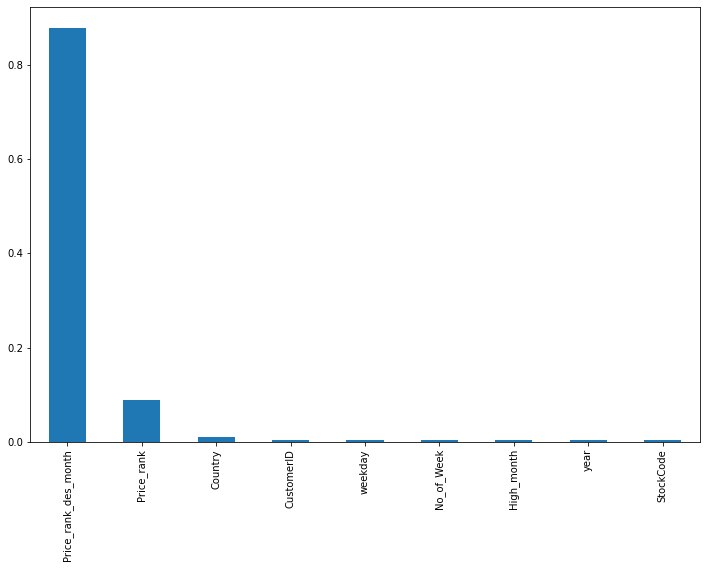

In [55]:
#Feature importance plot

imp_feat=pd.Series(model_xgb.feature_importances_,index=feature)
plt.figure(figsize=(12,8))
imp_feat.sort_values(ascending=False).plot(kind='bar')

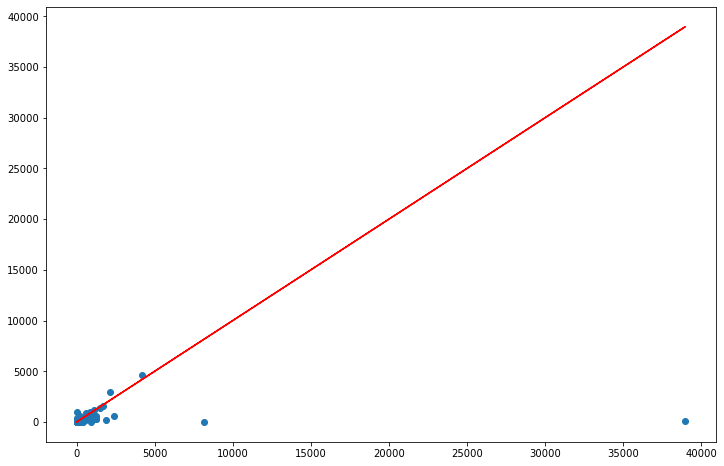

In [56]:
#prediction plot
plt.figure(figsize=(12,8))
plt.scatter(y_true,pred_xgb)
plt.plot(y_true,y_true,'r')

<b><u>To improve the prediction, tried to add new prediction to the dataframe and used it as a field to predict again

In [57]:
df_new = df #assign the train data to a new dataframe

In [58]:
df_test_new = df_test #assign the test data to a new dataframe

In [59]:
pred_final = np.expm1(model_xgb.predict(x1_test)) #prediction on test set

In [60]:
df_test_new['Pred_price'] = pred_final #add prediction of test set to the test set dataframe as a column

In [61]:
df_test_new.head() #new test set

,StockCode,CustomerID,Country,year,weekday,No_of_Week,High_month,Price_rank,Price_rank_des_month,Pred_price
0,1709,16161.0,35,2011,1,8,1,4.0,2.0,1.704831
1,510,17341.0,35,2010,2,49,9,3.0,1.0,1.246592
2,604,15158.0,35,2011,1,43,11,8.0,4.0,3.902684
3,1478,16033.0,35,2011,0,26,10,4.0,2.0,1.680385
4,3216,15351.0,35,2011,6,44,12,17.0,13.0,12.727825


In [62]:
pred_final_main = np.expm1(model_xgb.predict(X1_main)) #prediction on train set

In [63]:
df_new['Pred_price']=pred_final_main #add prediction of train set to the train set dataframe as a column
df_new.sample(10)

,StockCode,UnitPrice,CustomerID,Country,year,weekday,No_of_Week,High_month,Price_rank,Price_rank_des_month,Pred_price
28671,927,1.25,14554.0,35,2011,1,42,11,4,1,1.246382
169437,1457,0.29,16729.0,35,2011,1,44,12,2,0,0.292506
259518,1662,1.95,13760.0,35,2011,6,41,11,5,2,2.000372
205369,2077,4.95,16938.0,35,2011,3,48,9,10,5,4.914913
55839,1481,8.50,14711.0,35,2011,1,46,12,14,9,8.307730
30339,349,0.85,12748.0,35,2011,3,7,1,2,1,0.827575
154998,440,0.85,13069.0,35,2011,3,15,4,2,1,0.840057
156384,2599,4.95,15518.0,35,2011,6,31,3,10,5,4.918236
74926,860,1.25,15033.0,35,2011,6,26,5,3,1,1.246242
102138,881,1.25,16556.0,35,2010,1,50,9,3,1,1.254353


---

Tried running xgboost repetatively to reduce score

In [64]:
# #['UnitPrice','Description','InvoiceNo','month','Quantity','Price_rank','Price_rank_des_month']

# df_new = df_new.drop(['Description','InvoiceNo','month','Quantity','Price_rank','Price_rank_des_month'],axis=1)
# df_test_new = df_test_new.drop(['Description','InvoiceNo','month','Quantity','Price_rank','Price_rank_des_month'],axis=1)

In [65]:
# i=0

# while i<5:
#     print(i)
#     Xnew = df_new.drop(['UnitPrice'],axis=1).values 
#     ynew = np.log1p(df_new['UnitPrice'].values)
#     X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.30,random_state=42)
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)
#     X1new = scaler.transform(Xnew)
#     x1_test_new = scaler.transform(df_test_new.values)
    
#     model_xgb = XGBRegressor(n_estimators=260, max_depth=10,learning_rate=0.13,subsample = 0.5,reg_lambda=0.001)
#     model_xgb.fit(X_train,y_train)
    
#     pred_xgb = np.expm1(model_xgb.predict(X_test))
#     y_true = np.expm1(y_test)
#     print("r2_score=",r2_score(y_true,pred_xgb))
    
#     pred_final_main = np.expm1(model_xgb.predict(X1new))
#     df_new['Pred_price'] = pred_final_main
    
#     df_test_new['Pred_price'] = np.expm1(model_xgb.predict(x1_test_new))
#     i=i+1

Accuracy reduced from second itration

---

In [66]:
# Xnew = df.drop(['UnitPrice','Description','InvoiceNo','month','Quantity','Price_rank','Price_rank_des_month'],axis=1).values 

Xnew = df_new.drop(['UnitPrice','Price_rank','Price_rank_des_month'],axis=1).values 
ynew = np.log1p(df_new['UnitPrice'].values)

In [67]:
x1_test_new = df_test_new.drop(['Price_rank','Price_rank_des_month'],axis=1).values

In [68]:
feature_new = df_new.drop(['UnitPrice','Price_rank','Price_rank_des_month'],axis=1).columns

In [69]:
X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.01,random_state=42)

In [70]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
x1_test_new = scaler.transform(x1_test_new)

---

<b>Used lightgbm
    
---

In [72]:
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import GridSearchCV

# xgb = LGBMRegressor()
# parameters_lgb = {
#     'n_estimators': [230,250,270],
#     'max_depth': [9,10],
#     'learning_rate':[0.8,0.1],
#     'num_leaves':[180,200,250,300]
    
# }

# cv_gb = GridSearchCV(xgb, parameters_lgb, cv=3) 
# cv_gb.fit(X_train, y_train)

In [73]:
# cv_gb.best_params_
# {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 230, 'num_leaves': 200}

In [74]:
# model_xgb=LGBMRegressor(n_estimators=600,max_depth=10,learning_rate=0.15,num_leaves=400,boosting_type = 'dart', lambda_l2=0.05)
# model_xgb.fit(X_train,y_train)

The score has not improved

---

<b>Used xgboost again

In [89]:
# model_xgb = XGBRegressor(n_estimators=260, max_depth=10,learning_rate=0.13,subsample = 0.5,reg_lambda=0.001) #18.05160

model_xgb = XGBRegressor(n_estimators=400, max_depth=10,learning_rate=0.2,subsample = 0.5,reg_lambda=0.001) 
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.001, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
pred_xgb = np.expm1(model_xgb.predict(X_test))

y_true = np.expm1(y_test)

print("mean_squared_error=",mean_squared_error(y_true,pred_xgb))
print("explained_variance_score=",explained_variance_score(y_true,pred_xgb))
print("RMSE=",np.sqrt(mean_squared_error(y_true,pred_xgb))) 

print("r2_score=",r2_score(y_true,pred_xgb))#02879

mean_squared_error= 340.0213269471021
explained_variance_score= 0.5957233791810517
RMSE= 18.43966721356712
r2_score= 0.5954369620921189


In [91]:
pred_xgb_train = np.expm1(model_xgb.predict(X_train))

y_true_train = np.expm1(y_train)
print("mean_squared_error=",mean_squared_error(y_true_train,pred_xgb_train))
print("explained_variance_score=",explained_variance_score(y_true_train,pred_xgb_train))
print("RMSE=",np.sqrt(mean_squared_error(y_true_train,pred_xgb_train)))

print("r2_score=",r2_score(y_true_train,pred_xgb_train))

mean_squared_error= 56.19116542777499
explained_variance_score= 0.9909370629874032
RMSE= 7.496076669016599
r2_score= 0.990937005090066


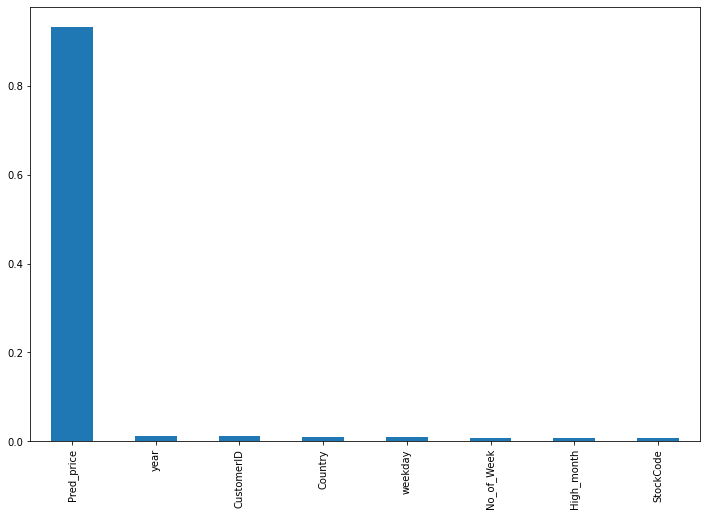

In [92]:
imp_feat=pd.Series(model_xgb.feature_importances_,index=feature_new)
plt.figure(figsize=(12,8))
imp_feat.sort_values(ascending=False).plot(kind='bar')

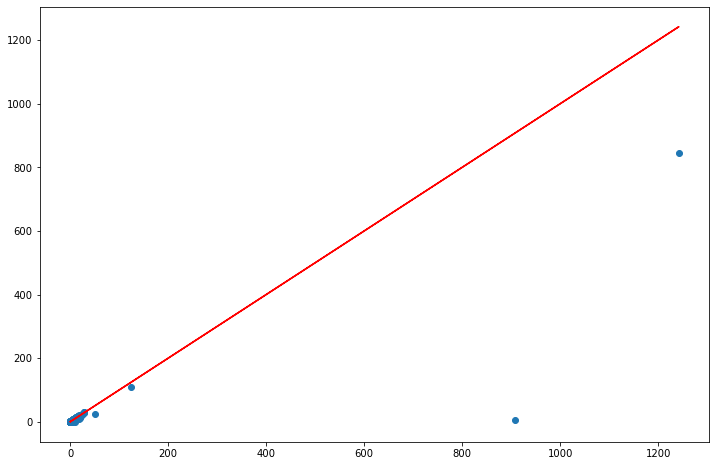

In [93]:
plt.figure(figsize=(12,8))
plt.scatter(y_true,pred_xgb)
plt.plot(y_true,y_true,'r')

---

<h1>Final Prediction for submission
    
    
---

In [80]:
# pred_final = np.expm1(model_xgb.predict(x1_test_new))
# pred_csv = pd.DataFrame(pred_final,columns=['UnitPrice'])
# pred_csv.to_csv('prediction.csv', index = False)

<b><u>Final score was recored in leader board as 18.05160 with 70 data